In [4]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Merge files

Since the files are saved as separate csv files, each represents a month of meetings of each zoom host accounts. Therefore, we need to synthesize them into 1 big file to analyze

In [ ]:
files = glob.glob(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\*\*.csv")
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

df.to_csv(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\zoom_allmeetings.csv", index=False)

## Cleaning

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Studio Code\customer_retention_data\zoom\zoom_allmeetings.csv")
df

NameError: name 'pd' is not defined

In [ ]:
#Drop rows where it is all NaN
df = df.dropna(how='all').reset_index(drop=True)
df

,Topic,Type,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Total participant minutes,...,Creation time,CANVAS,Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,Recording disclaimer response,In waiting room
0,2500COM,Meeting,976 6467 4097,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:27,9/30/2024 19:27,1.0,1.0,1.0,...,9/27/2024 1:09,NaN,ta1@minhvietacademy.org,ta1@minhvietacademy.org,9/30/2024 19:27,9/30/2024 19:27,1.0,No,No Response,No
1,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
2,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,OK,No
3,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
4,2501HUM,Meeting,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,9138.0,...,9/27/2024 1:09,NaN,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,No Response,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278573,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,05/05/2025 07:12:31 PM,05/05/2025 07:25:37 PM,14.0,No,No Response,No
278574,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Doan Cam Tu 70116,19070116@minhvietacademy.org,05/05/2025 07:17:46 PM,05/05/2025 07:25:36 PM,8.0,No,No Response,No
278575,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,05/05/2025 07:22:10 PM,05/05/2025 07:25:37 PM,4.0,No,No Response,No
278576,25APENG,Meeting,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,1615.0,...,04/25/2025 01:54:17 AM,NaN,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,05/05/2025 06:43:03 PM,05/05/2025 06:43:03 PM,0.0,No,No Response,No


In [3]:
#drop the rows that have participants < 5: These are the classes that were opened by mistake
df = df[df['Participants']>=5].reset_index(drop=True)
df.head()

NameError: name 'df' is not defined

In [43]:
#Select the targeted columns
df = df[['Topic', 'ID', 'Host name', 'Host email','Start time',
       'End time', 'Participants', 'Duration (minutes)', 'Name (original name)', 
       'Email', 'Join time', 'Leave time','Duration (minutes).1', 'Guest'
       ]]

df

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,05/05/2025 07:12:31 PM,05/05/2025 07:25:37 PM,14.0,No
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,05/05/2025 07:17:46 PM,05/05/2025 07:25:36 PM,8.0,No
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,05/05/2025 07:22:10 PM,05/05/2025 07:25:37 PM,4.0,No
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,05/05/2025 06:43:03 PM,05/05/2025 06:43:03 PM,0.0,No


In [44]:
#Derive Student ID (SID) into a new separate column based on their email
df['SID'] = pd.to_numeric(df['Email'].str.split('@').str[0], errors='coerce')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17076\1147953407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SID'] = pd.to_numeric(df['Email'].str.split('@').str[0], errors='coerce')


,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,SID
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,NaN
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,NaN
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,23001816.0
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,22002469.0
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,24002190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,05/05/2025 07:12:31 PM,05/05/2025 07:25:37 PM,14.0,No,19050342.0
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,05/05/2025 07:17:46 PM,05/05/2025 07:25:36 PM,8.0,No,19070116.0
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,05/05/2025 07:22:10 PM,05/05/2025 07:25:37 PM,4.0,No,22002927.0
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,05/05/2025 06:43:03 PM,05/05/2025 06:43:03 PM,0.0,No,19052826.0


In [ ]:
#Change the SID column to integers
df['SID'] = df['SID'].astype('Int64')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17076\3925558277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SID'] = df['SID'].astype('Int64')


,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,SID
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,<NA>
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,"Hoang Anh, Bao",NaN,9/30/2024 19:25,9/30/2024 20:25,60.0,Yes,<NA>
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,23001816
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,22002469
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,9/30/2024 19:25,9/30/2024 20:25,60.0,No,24002190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,05/05/2025 07:12:31 PM,05/05/2025 07:25:37 PM,14.0,No,19050342
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,05/05/2025 07:17:46 PM,05/05/2025 07:25:36 PM,8.0,No,19070116
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,05/05/2025 07:22:10 PM,05/05/2025 07:25:37 PM,4.0,No,22002927
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,05/05/2025 06:24:38 PM,05/05/2025 07:25:37 PM,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,05/05/2025 06:43:03 PM,05/05/2025 06:43:03 PM,0.0,No,19052826


In [ ]:
#convert the Time columns into Datetime format 
date_cols = ['Start time', 'End time', 'Join time', 'Leave time']
class_12h_datetime = ['2501HUM', '2500COM', '2501MAT', '25BA4', '25BA1']

def convert_datetime(row,col):
    try:
        if row['Topic'] in class_12h_datetime:
            return pd.to_datetime(row[col], errors='coerce')
        else:
            return pd.to_datetime(row[col], format = "%m/%d/%Y %I:%M:%S %p", errors='coerce')
    except:
        return pd.NaT

for col in date_cols:
    df[col] = df.apply(lambda row: convert_datetime(row, col), axis=1)

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17076\2606887375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.apply(lambda row: convert_datetime(row, col), axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17076\2606887375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.apply(lambda row: convert_datetime(row, col), axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17076\2606887375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,SID
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,<NA>
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,"Hoang Anh, Bao",NaN,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,Yes,<NA>
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,23001816
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,22002469
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,24002190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,2025-05-05 19:12:31,2025-05-05 19:25:37,14.0,No,19050342
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,2025-05-05 19:17:46,2025-05-05 19:25:36,8.0,No,19070116
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,2025-05-05 19:22:10,2025-05-05 19:25:37,4.0,No,22002927
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:43:03,2025-05-05 18:43:03,0.0,No,19052826


In [52]:
#Check the duplicates
dupes = df[df.duplicated(subset=['ID', 'SID', 'Join time', 'Leave time', 'Name (original name)', 'Duration (minutes).1'], keep=False)]
dupes

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,SID
1024,2500COM,919 7293 4687,schedule 1,schedule1@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,140.0,59.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,59.0,No,23003061
1025,2500COM,919 7293 4687,schedule 1,schedule1@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,140.0,59.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-25 18:26:00,2024-09-25 19:25:00,59.0,No,23003061
3710,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,128.0,58.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,58.0,No,23003061
3719,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,128.0,58.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-09-12 18:28:00,2024-09-12 19:25:00,58.0,No,23003061
4790,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-09 18:26:00,2024-09-09 19:25:00,156.0,59.0,"Nguyen Minh, Dang Nhat",NaN,2024-09-09 18:27:00,2024-09-09 18:34:00,8.0,Yes,<NA>
4792,2500COM,950 8205 0125,schedule 1,schedule1@minhvietacademy.org,2024-09-09 18:26:00,2024-09-09 19:25:00,156.0,59.0,"Nguyen Minh, Dang Nhat",NaN,2024-09-09 18:27:00,2024-09-09 18:34:00,8.0,Yes,<NA>
7468,2500COM,929 5583 6200,schedule 1,schedule1@minhvietacademy.org,2024-10-24 18:25:00,2024-10-24 19:25:00,131.0,60.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-10-24 18:30:00,2024-10-24 19:25:00,55.0,No,23003061
7475,2500COM,929 5583 6200,schedule 1,schedule1@minhvietacademy.org,2024-10-24 18:25:00,2024-10-24 19:25:00,131.0,60.0,Nguyen Ha Dan Thanh 03061,23003061@minhvietacademy.org,2024-10-24 18:30:00,2024-10-24 19:25:00,55.0,No,23003061
8070,2501HUM,994 5232 3853,schedule 1,schedule1@minhvietacademy.org,2024-10-22 19:26:00,2024-10-22 20:25:00,207.0,60.0,"Le ,Hoang",NaN,2024-10-22 20:08:00,2024-10-22 20:08:00,1.0,Yes,<NA>
8071,2501HUM,994 5232 3853,schedule 1,schedule1@minhvietacademy.org,2024-10-22 19:26:00,2024-10-22 20:25:00,207.0,60.0,"Le ,Hoang",NaN,2024-10-22 20:08:00,2024-10-22 20:08:00,1.0,Yes,<NA>


It seems like the duplicates are due to some specific students that use 2 devices at the same time. So, I will remove the duplicates

In [ ]:
#Drop duplicates
df = df.drop_duplicates(subset=['ID', 'SID', 'Join time', 'Leave time', 'Name (original name)', 'Duration (minutes).1'], keep='last')

In [ ]:
# Add Time, Date, Hour columns for later matching with other data and analysis
df['date'] = df['Start time'].dt.date
df['time'] = df['Start time'].dt.time
df['day_of_week'] = df['Start time'].dt.day_name()
df['hour'] = df['Start time'].dt.hour

df

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,SID,date,time,day_of_week,hour
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,<NA>,2024-09-30,19:25:00,Monday,19
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,"Hoang Anh, Bao",NaN,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,Yes,<NA>,2024-09-30,19:25:00,Monday,19
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,23001816,2024-09-30,19:25:00,Monday,19
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,22002469,2024-09-30,19:25:00,Monday,19
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,60.0,No,24002190,2024-09-30,19:25:00,Monday,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,2025-05-05 19:12:31,2025-05-05 19:25:37,14.0,No,19050342,2025-05-05,18:24:38,Monday,18
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,2025-05-05 19:17:46,2025-05-05 19:25:36,8.0,No,19070116,2025-05-05,18:24:38,Monday,18
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,2025-05-05 19:22:10,2025-05-05 19:25:37,4.0,No,22002927,2025-05-05,18:24:38,Monday,18
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,2025-05-05 18:43:03,2025-05-05 18:43:03,0.0,No,19052826,2025-05-05,18:24:38,Monday,18


As there are always Teachers & Teaching Assistants (TA) in class, I will derive their role.

In [ ]:
#Make sure Email is all string -> derive from email
df['Email'] = df['Email'].astype(str).str.strip()

#Split the part before '@' to see if it is an student email or TA (Teaching Assistant)/Teacher email
df['SID_str'] = df['Email'].str.split('@').str[0]
def role(value):
    if value == 'nan':
        return 'Student'
    elif str(value).isnumeric():
        return 'Student'
    else:
        return 'TA/Teacher'

df['role'] = df['SID_str'].apply(lambda x: role(x))
df

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,...,Leave time,Duration (minutes).1,Guest,SID,date,time,day_of_week,hour,SID_str,role
0,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,TA Phung ( schedule 1 ) (Host),schedule1@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,<NA>,2024-09-30,19:25:00,Monday,19,schedule1,TA/Teacher
1,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,"Hoang Anh, Bao",nan,...,2024-09-30 20:25:00,60.0,Yes,<NA>,2024-09-30,19:25:00,Monday,19,nan,Student
2,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Mai Nguyen Truc Linh 01816,23001816@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,23001816,2024-09-30,19:25:00,Monday,19,23001816,Student
3,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Nguyen Pham Nhat Minh 02469,22002469@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,22002469,2024-09-30,19:25:00,Monday,19,22002469,Student
4,2501HUM,977 3083 0512,schedule 1,schedule1@minhvietacademy.org,2024-09-30 19:25:00,2024-09-30 20:25:00,211.0,60.0,Yen Ha Tu Vy 02190,24002190@minhvietacademy.org,...,2024-09-30 20:25:00,60.0,No,24002190,2024-09-30,19:25:00,Monday,19,24002190,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278213,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Bao Linh 50342,19050342@minhvietacademy.org,...,2025-05-05 19:25:37,14.0,No,19050342,2025-05-05,18:24:38,Monday,18,19050342,Student
278214,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Doan Cam Tu 70116,19070116@minhvietacademy.org,...,2025-05-05 19:25:36,8.0,No,19070116,2025-05-05,18:24:38,Monday,18,19070116,Student
278215,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Tran Thi Phuong Mai 02927,22002927@minhvietacademy.org,...,2025-05-05 19:25:37,4.0,No,22002927,2025-05-05,18:24:38,Monday,18,22002927,Student
278216,25APENG,996 9559 8473,Schedule 9,schedule9@minhvietacademy.org,2025-05-05 18:24:38,2025-05-05 19:25:37,40.0,61.0,Nguyen Tran Huyen Ngoc 52826,19052826@minhvietacademy.org,...,2025-05-05 18:43:03,0.0,No,19052826,2025-05-05,18:24:38,Monday,18,19052826,Student


#### Data Consistency Check

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278204 entries, 0 to 278217
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Topic                 278204 non-null  object        
 1   ID                    278204 non-null  object        
 2   Host name             278204 non-null  object        
 3   Host email            278204 non-null  object        
 4   Start time            278204 non-null  datetime64[ns]
 5   End time              278204 non-null  datetime64[ns]
 6   Participants          278204 non-null  float64       
 7   Duration (minutes)    278204 non-null  float64       
 8   Name (original name)  278204 non-null  object        
 9   Email                 278204 non-null  object        
 10  Join time             278204 non-null  datetime64[ns]
 11  Leave time            278204 non-null  datetime64[ns]
 12  Duration (minutes).1  278204 non-null  float64       
 13  Gues

In [80]:
df.isna().sum()

Topic                       0
ID                          0
Host name                   0
Host email                  0
Start time                  0
End time                    0
Participants                0
Duration (minutes)          0
Name (original name)        0
Email                       0
Join time                   0
Leave time                  0
Duration (minutes).1        0
Guest                       0
SID                     46187
date                        0
time                        0
day_of_week                 0
hour                        0
SID_str                     0
role                        0
dtype: int64

In [86]:
pd.set_option('display.max_rows', None)
df['Topic'].value_counts()
#pd.reset_option('display.max_rows', None)


Topic
2535EFL                      23076
2500COM                      17710
2502HUM                      17616
2503HUM                      17177
2501HUM                      17007
2504HUM                      16135
2505HUM                      15675
2506SCI                       9108
2506ELA                       8362
2506MAT                       7427
2569EFL1                      7419
2506WHI                       7393
2507SCI                       7195
2569EFL2                      7035
2507GEO                       7016
2507ELA                       6732
2507MAT                       6712
25APENG                       6620
2501MAT                       6280
2502MAT                       6252
2503MAT                       6050
2504MAT                       5790
2505MAT                       5452
25ECON                        4912
25APBIO                       4876
2508SCI                       4580
25APPCL                       4170
2508UHI                       4104
2508ELA       

-> `Schedule 8's Zoom Meeting` is a personal meeting, not a class from the organization so it needs to be removed.

In [ ]:
#Remove unrelevant data
df = df[~(df['Topic'] == "Schedule 8's Zoom Meeting")]
df['Topic'].value_counts()

Topic
2535EFL       23076
2500COM       17710
2502HUM       17616
2503HUM       17177
2501HUM       17007
2504HUM       16135
2505HUM       15675
2506SCI        9108
2506ELA        8362
2506MAT        7427
2569EFL1       7419
2506WHI        7393
2507SCI        7195
2569EFL2       7035
2507GEO        7016
2507ELA        6732
2507MAT        6712
25APENG        6620
2501MAT        6280
2502MAT        6252
2503MAT        6050
2504MAT        5790
2505MAT        5452
25ECON         4912
25APBIO        4876
2508SCI        4580
25APPCL        4170
2508UHI        4104
2508ELA        3776
2508MAT        3728
25BA2          2674
25BA3          2474
25BA5          2101
25BA4          1997
25MH6          1746
25BA1          1673
25APBIOLAB      149
Name: count, dtype: int64

## EDA

In [91]:
df.describe(include='all')

,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,...,Leave time,Duration (minutes).1,Guest,SID,date,time,day_of_week,hour,SID_str,role
count,278199,278199,278199,278199,278199,278199,278199.000000,278199.000000,278199,278199,...,278199,278199.000000,278199,232017.0,278199,278199,278199,278199.000000,278199,278199
unique,37,1184,7,7,NaN,NaN,NaN,NaN,11561,1667,...,NaN,NaN,2,<NA>,173,662,7,NaN,1667,2
top,2535EFL,943 4030 4725,Schedule 2,schedule2@minhvietacademy.org,NaN,NaN,NaN,NaN,Nguyen Son Tung 13246,nan,...,NaN,NaN,No,<NA>,2024-09-10,19:26:00,Wednesday,NaN,nan,Student
freq,23076,1321,74946,74946,NaN,NaN,NaN,NaN,618,39299,...,NaN,NaN,238900,<NA>,2504,4311,68344,NaN,39299,271316
mean,NaN,NaN,NaN,NaN,2025-01-07 06:46:13.553801984,2025-01-07 07:45:32.710883072,133.816315,59.819367,NaN,NaN,...,2025-01-07 07:39:19.977383168,43.375566,NaN,21655648.390066,NaN,NaN,NaN,18.689719,NaN,NaN
min,NaN,NaN,NaN,NaN,2024-09-04 18:24:49,2024-09-04 19:24:02,8.000000,2.000000,NaN,NaN,...,2024-09-04 18:25:47,0.000000,NaN,19040015.0,NaN,NaN,NaN,7.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2024-10-23 18:24:45,2024-10-23 19:24:04,95.000000,59.000000,NaN,NaN,...,2024-10-23 19:08:23,35.000000,NaN,20027982.0,NaN,NaN,NaN,18.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2025-01-07 18:26:50,2025-01-07 19:26:27,144.000000,60.000000,NaN,NaN,...,2025-01-07 19:26:03,50.000000,NaN,22000572.0,NaN,NaN,NaN,19.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2025-03-19 19:27:13,2025-03-19 20:26:39,171.000000,61.000000,NaN,NaN,...,2025-03-19 20:26:39,57.000000,NaN,23002363.0,NaN,NaN,NaN,19.000000,NaN,NaN
max,NaN,NaN,NaN,NaN,2025-05-30 19:28:59,2025-05-30 20:55:38,258.000000,247.000000,NaN,NaN,...,2025-05-30 20:55:38,233.000000,NaN,25000396.0,NaN,NaN,NaN,20.000000,NaN,NaN


In [ ]:
#Check if those classes that last longer than 100 minutes (>1.5 hour) are outliers / mistakes or not
pd.set_option('display.max_columns', None)
df[df['Duration (minutes)'] > 100]
pd.reset_option('display.max_rows', None)


,Topic,ID,Host name,Host email,Start time,End time,Participants,Duration (minutes),Name (original name),Email,Join time,Leave time,Duration (minutes).1,Guest,SID,date,time,day_of_week,hour,SID_str,role
245519,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Schedule 8 (Host),schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 19:27:44,2.0,No,<NA>,2024-12-03,19:26:08,Tuesday,19,schedule8,TA/Teacher
245520,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Le Ngoc Tan Dan 34444,20034444@minhvietacademy.org,2024-12-03 19:27:01,2024-12-03 20:09:47,43.0,No,20034444,2024-12-03,19:26:08,Tuesday,19,20034444,Student
245521,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Nguyen Nhat Quang 01075,24001075@minhvietacademy.org,2024-12-03 19:27:09,2024-12-03 20:22:56,56.0,No,24001075,2024-12-03,19:26:08,Tuesday,19,24001075,Student
245522,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Le Tran Minh 34095,20034095@minhvietacademy.org,2024-12-03 19:27:10,2024-12-03 19:46:54,20.0,No,20034095,2024-12-03,19:26:08,Tuesday,19,20034095,Student
245523,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Le Tuong Vi 34879,20034879@minhvietacademy.org,2024-12-03 19:27:11,2024-12-03 20:30:05,63.0,No,20034879,2024-12-03,19:26:08,Tuesday,19,20034879,Student
245524,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,TA Thanh ( Schedule 8 ) (Host),schedule8@minhvietacademy.org,2024-12-03 19:27:12,2024-12-03 21:36:22,130.0,No,<NA>,2024-12-03,19:26:08,Tuesday,19,schedule8,TA/Teacher
245525,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Tran Le Anh 01423,23001423@minhvietacademy.org,2024-12-03 19:27:13,2024-12-03 20:01:58,35.0,No,23001423,2024-12-03,19:26:08,Tuesday,19,23001423,Student
245526,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Nguyen Khanh Linh 00475,24000475@minhvietacademy.org,2024-12-03 19:27:16,2024-12-03 20:25:48,59.0,No,24000475,2024-12-03,19:26:08,Tuesday,19,24000475,Student
245527,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Vu Minh Hieu 45539,20045539@minhvietacademy.org,2024-12-03 19:27:16,2024-12-03 20:29:19,63.0,No,20045539,2024-12-03,19:26:08,Tuesday,19,20045539,Student
245528,2508ELA,995 0383 6135,Schedule 8,schedule8@minhvietacademy.org,2024-12-03 19:26:08,2024-12-03 21:36:22,62.0,131.0,Nguyen Tam Nhu 04189,20004189@minhvietacademy.org,2024-12-03 19:27:37,2024-12-03 20:25:44,59.0,No,20004189,2024-12-03,19:26:08,Tuesday,19,20004189,Student


-> No inconsistencies

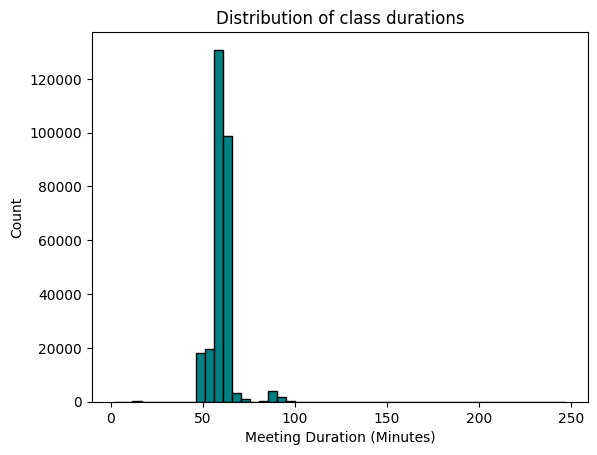

In [106]:
plt.hist(df['Duration (minutes)'], bins=50, edgecolor='black', color='teal')
plt.xlabel('Meeting Duration (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of class durations')
plt.show()

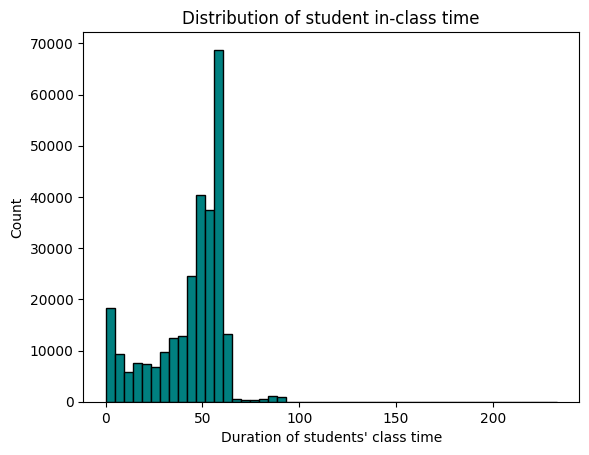

In [105]:
plt.hist(df['Duration (minutes).1'], bins=50, edgecolor='black', color='teal')
plt.xlabel("Duration of students' class time")
plt.ylabel('Count')
plt.title('Distribution of student in-class time')
plt.show()

In [ ]:
df['student_stay_ratio'] = df['Duration (minutes).1']/df['Duration (minutes)']
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17076\2665816764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['student_stay_ratio'] = df['Duration (minutes).1']/df['Duration (minutes)']


In [1]:
df.head()

NameError: name 'df' is not defined